In [1]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
num_iter=500
num_pop=120
df_mpa=pd.read_csv('MPA_{}Iter_{}Pop.csv'.format(num_iter,num_pop))
df_mpa['Porcentaje de paquetes entregados'] = df_mpa['Porcentaje de paquetes entregados'].str.rstrip('%').astype('float') /100
#Leer aquí el archivo de ACO

df_aco=pd.read_csv('ACO_results.csv')
df_aco['Porcentaje de paquetes entregados'] = df_aco['Porcentaje de paquetes entregados'].str.rstrip('%').astype('float') /100

# Normalidad

Referencia: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/

Usaremos el test de Shapiro-Wilk para determinar si una muestra de datos sigue una distribución normal dado que nuestro dataset es pequeño (menos de 50 observaciones).

In [7]:
#Testear normalidad de Tiempo de ejecucion
print('Test de normalidad de Tiempo de ejecución para MPA\n'+ '-'*50)


#Plot
# df_mpa['Tiempo de ejecucion (ms)'].plot(kind='hist', title='Histograma de Tiempo de ejecucion')
# plt.show()

#Test de Shapiro-Wilk
shapiro_test = stats.shapiro(df_mpa['Tiempo de ejecucion (ms)'])
print('Shapiro-Wilk Test para Tiempo de ejecucion')
print('Estadistico:', shapiro_test[0])
print('P-valor:', shapiro_test[1])

#Test de normalidad de Porcentaje de paquetes entregados
print('\nTest de normalidad de Porcentaje de paquetes entregados para MPA\n'+ '-'*50)

#Plot
# df_mpa['Porcentaje de paquetes entregados'].plot(kind='hist', title='Histograma de Porcentaje de paquetes entregados')
# plt.show()

#Test de Shapiro-Wilk
shapiro_test = stats.shapiro(df_mpa['Porcentaje de paquetes entregados'])
print('Shapiro-Wilk Test para Porcentaje de paquetes entregados')
print('Estadistico:', shapiro_test[0])
print('P-valor:', shapiro_test[1])




Test de normalidad de Tiempo de ejecución para MPA
--------------------------------------------------
Shapiro-Wilk Test para Tiempo de ejecucion
Estadistico: 0.9509227275848389
P-valor: 0.17895066738128662

Test de normalidad de Porcentaje de paquetes entregados para MPA
--------------------------------------------------
Shapiro-Wilk Test para Porcentaje de paquetes entregados
Estadistico: 0.9538814425468445
P-valor: 0.214530810713768


In [14]:
print('\nTest de normalidad de Tiempo de ejecucion para ACO\n'+ '-'*50)

#Test de Shapiro-Wilk
shapiro_test = stats.shapiro(df_aco['Tiempo de ejecucion (ms)'])
print('Shapiro-Wilk Test para Tiempo de ejecucion')
print('Estadistico:', shapiro_test[0])
print('P-valor:', shapiro_test[1])


# df_aco['Tiempo de ejecucion (ms)'].plot(kind='hist', title='Histograma de Tiempo de ejecucion')
# plt.show()

#Test de normalidad de Porcentaje de paquetes entregados
print('\nTest de normalidad de Porcentaje de paquetes entregados para ACO\n'+ '-'*50)

#Test de Shapiro-Wilk
shapiro_test = stats.shapiro(df_aco['Porcentaje de paquetes entregados'])
print('Shapiro-Wilk Test para Porcentaje de paquetes entregados')
print('Estadistico:', shapiro_test[0])
print('P-valor:', shapiro_test[1])




Test de normalidad de Tiempo de ejecucion para ACO
--------------------------------------------------
Shapiro-Wilk Test para Tiempo de ejecucion
Estadistico: 0.932098388671875
P-valor: 0.05584064498543739

Test de normalidad de Porcentaje de paquetes entregados para ACO
--------------------------------------------------
Shapiro-Wilk Test para Porcentaje de paquetes entregados
Estadistico: 0.9489412903785706
P-valor: 0.15836232900619507


# Homocedasticidad (igualdad de varianzas)

Aquí para tiempo de ejecución 

In [17]:
#Se usará la prueba de Fisher para comparar las varianzas de los dos algoritmos
#H0: Las varianzas son iguales
#H1: Las varianzas son diferentes


df_other=df_aco

# Levene's test para la igualdad de varianzas
w, p_value = stats.levene(df_mpa['Tiempo de ejecucion (ms)'], df_other['Tiempo de ejecucion (ms)'])
print(f"Resultado de la prueba de Levene para Tiempo de ejecucion: Estadístico de prueba: {w}, p-valor: {p_value}")

h0="Las varianzas de los dos algoritmos son iguales"
h1="Las varianzas de los dos algoritmos son diferentes"
# Si el p-valor es menor a 0.05, se rechaza la hipótesis nula
if p_value < 0.05:
    print(f"Se rechaza la hipótesis nula: {h1}")
else:
    print(f"No se rechaza la hipótesis nula: {h0}")


Resultado de la prueba de Levene para Tiempo de ejecucion: Estadístico de prueba: 10.896401289625997, p-valor: 0.0016520134852967341
Se rechaza la hipótesis nula: Las varianzas de los dos algoritmos son diferentes


Aquí para porcentaje de entrega

In [18]:
#Se usará la prueba de Fisher para comparar las varianzas de los dos algoritmos
#H0: Las varianzas son iguales
#H1: Las varianzas son diferentes


df_other=df_aco

# Levene's test para la igualdad de varianzas
w, p_value = stats.levene(df_mpa['Porcentaje de paquetes entregados'], df_other['Porcentaje de paquetes entregados'])
print(f"Resultado de la prueba de Levene para Porcentaje de paquetes entregados: Estadístico de prueba: {w}, p-valor: {p_value}")


if p_value < 0.05:
    print(f"Se rechaza la hipótesis nula: {h1}")
else:
    print(f"No se rechaza la hipótesis nula: {h0}")

Resultado de la prueba de Levene para Porcentaje de paquetes entregados: Estadístico de prueba: 7.313478716801619, p-valor: 0.008967530745050118
Se rechaza la hipótesis nula: Las varianzas de los dos algoritmos son diferentes


# Para comparar los dos algoritmos

Dado que se comprobó la normalidad de los datos, pero no la homocedasticidad, se usará el test U de Mann-Whitney para comparar los dos algoritmos.

Resultado de la prueba U de Mann-Whitney para Tiempo de ejecucion: Estadístico de prueba: 900.0, p-valor: 3.019859359162157e-11
Se rechaza la hipótesis nula: Las medianas de los dos algoritmos son diferentes


<Figure size 640x480 with 0 Axes>

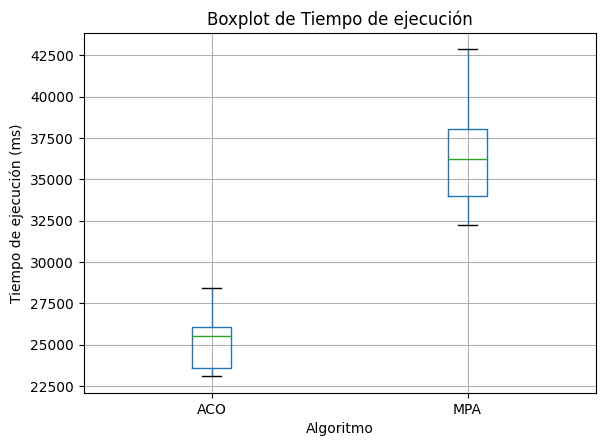

In [30]:
# Se usa la prueba U de Mann-Whitney para comparar las medias de los dos algoritmos
h0 = "Las medianas de los dos algoritmos son iguales"
h1 = "Las medianas de los dos algoritmos son diferentes"

u, p_value = stats.mannwhitneyu(df_mpa['Tiempo de ejecucion (ms)'], df_aco['Tiempo de ejecucion (ms)'])
print(f"Resultado de la prueba U de Mann-Whitney para Tiempo de ejecucion: Estadístico de prueba: {u}, p-valor: {p_value}")

if p_value < 0.05:
    print(f"Se rechaza la hipótesis nula: {h1}")
else:
    print(f"No se rechaza la hipótesis nula: {h0}")

#Boxplot de ambos algoritmos
df_mpa['Algoritmo']='MPA'
df_aco['Algoritmo']='ACO'
df=pd.concat([df_mpa,df_aco])

plt.figure()
df.boxplot(column='Tiempo de ejecucion (ms)', by='Algoritmo')
plt.title('Boxplot de Tiempo de ejecución')
plt.ylabel('Tiempo de ejecución (ms)')
plt.suptitle('')
plt.show()






Y ahora para el porcentaje de entrega

Resultado de la prueba U de Mann-Whitney para Porcentaje de paquetes entregados: Estadístico de prueba: 529.5, p-valor: 0.24079595856589087
No se rechaza la hipótesis nula: Las medianas de los dos algoritmos son iguales


<Figure size 640x480 with 0 Axes>

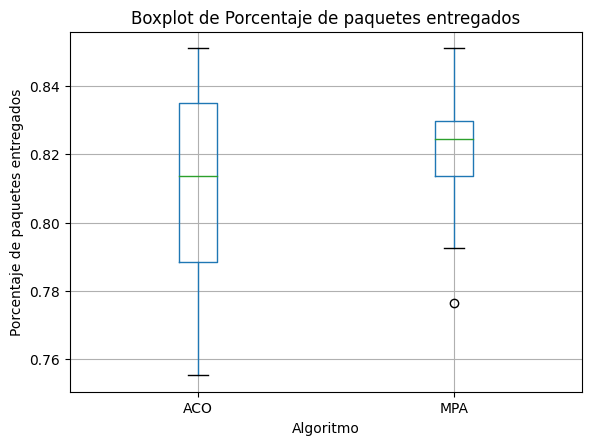

In [31]:
#Se usa la prueba U de Mann-Whitney para comparar las medias de los dos algoritmos
h0 = "Las medianas de los dos algoritmos son iguales"
h1 = "Las medianas de los dos algoritmos son diferentes"

u, p_value = stats.mannwhitneyu(df_mpa['Porcentaje de paquetes entregados'], df_aco['Porcentaje de paquetes entregados'])
print(f"Resultado de la prueba U de Mann-Whitney para Porcentaje de paquetes entregados: Estadístico de prueba: {u}, p-valor: {p_value}")

if p_value < 0.05:
    print(f"Se rechaza la hipótesis nula: {h1}")
else:
    print(f"No se rechaza la hipótesis nula: {h0}")

#Boxplot de ambos algoritmos
plt.figure()
df.boxplot(column='Porcentaje de paquetes entregados', by='Algoritmo')
plt.title('Boxplot de Porcentaje de paquetes entregados')
plt.ylabel('Porcentaje de paquetes entregados')
plt.suptitle('')
plt.show()
